# Analyzing Customer Churn and Credit Scores: A Case Study in Banking

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Bank Churn.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
data_exited_1 = data[data["Exited"] == 1]
data_exited_0 = data[data["Exited"] == 0]

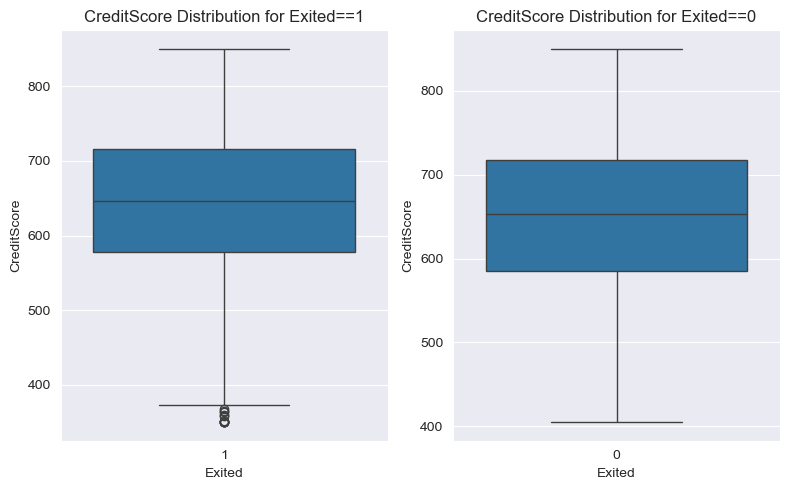

In [9]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Exited", y="CreditScore", data=data_exited_1)
plt.title("CreditScore Distribution for Exited==1")

plt.subplot(1, 2, 2)
sns.boxplot(x="Exited", y="CreditScore", data=data_exited_0)
plt.title("CreditScore Distribution for Exited==0")

plt.tight_layout()

plt.show()

In [11]:
skewness_exited_1 = stats.skew(data_exited_1["CreditScore"])
skewness_exited_0 = stats.skew(data_exited_0["CreditScore"])

print(f"Skewness for Exited==1: {skewness_exited_1:.2f}")
print(f"Skewness for Exited==0: {skewness_exited_0:.2f}")

Skewness for Exited==1: -0.14
Skewness for Exited==0: -0.05


In [12]:
data.groupby("Exited")["CreditScore"].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,651.853196,95.653837,405.0,585.0,653.0,718.0,850.0
1,2037.0,645.351497,100.321503,350.0,578.0,646.0,716.0,850.0


In [16]:
summary_credit_score = data.groupby("Exited")["CreditScore"].agg(["count", "mean"])
summary_credit_score = summary_credit_score.rename(columns={"count": "Count", "mean": "Mean"})
summary_credit_score.round(2)

,Count,Mean
Exited,,
0,7963,651.85
1,2037,645.35


In [19]:
cross_table = pd.crosstab(data["Geography"], data["Exited"], margins=True, margins_name="Total")
cross_table_proportions = cross_table.div(cross_table["Total"], axis=0) * 100
cross_table = cross_table.rename(columns={0: "Not Exited", 1: "Exited"})
cross_table_proportions = cross_table_proportions.rename(columns={0: "Not Exited (%)", 1: "Exited (%)"})
print(f"Cross Table:\n{cross_table}\n")
print(f"Cross Table Proportions:\n{cross_table_proportions.round(2)}\n")

Cross Table:
Exited     Not Exited  Exited  Total
Geography                           
France           4204     810   5014
Germany          1695     814   2509
Spain            2064     413   2477
Total            7963    2037  10000

Cross Table Proportions:
Exited     Not Exited (%)  Exited (%)  Total
Geography                                   
France              83.85       16.15  100.0
Germany             67.56       32.44  100.0
Spain               83.33       16.67  100.0
Total               79.63       20.37  100.0



In [20]:
correlation_coefficient = data["CreditScore"].corr(data["EstimatedSalary"])
correlation_coefficient.round(4)

-0.0014

In [26]:
data["CreditScore_Cat"] = np.where(data["CreditScore"] >= 650, "Above", "Bellow")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_Cat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Bellow
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Bellow
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Bellow
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Above
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Above


In [27]:
cross_table = pd.crosstab(data["CreditScore_Cat"], data["Exited"], margins=False)
cross_table_proportions = (cross_table.div(cross_table.sum(axis=1), axis=0) * 100).round(2)
cross_table = cross_table.rename(columns={0: "Not Exited", 1: "Exited"})
cross_table_proportions = cross_table_proportions.rename(columns={0: "Not Exited", 1: "Exited"})
print(f"Cross Table:\n{cross_table}\n")
print(f"Cross Table Proportions:\n{cross_table_proportions}\n")

Cross Table:
Exited           Not Exited  Exited
CreditScore_Cat                    
Above                  4112     988
Bellow                 3851    1049

Cross Table Proportions:
Exited           Not Exited  Exited
CreditScore_Cat                    
Above                 80.63   19.37
Bellow                78.59   21.41



In [28]:
top_300_customers = data.sort_values(by="CreditScore", ascending=False).head(300)
get_distribution_top_300 = pd.crosstab(top_300_customers["Geography"], columns="Count")
print("Geography Distribution for Top 300 Customers:\n", get_distribution_top_300, "\n")

Geography Distribution for Top 300 Customers:
 col_0      Count
Geography       
France       150
Germany       80
Spain         70 



In [38]:
summary_credit_score = data.groupby(by = ["Geography", "Gender"])["CreditScore"].agg(["count", "mean", "median"])
summary_credit_score

count        mean  median
Geography Gender                           
France    Female   2261  649.185759   652.0
          Male     2753  650.064657   653.0
Germany   Female   1193  653.093881   651.0
          Male     1316  649.966565   650.5
Spain     Female   1089  651.769513   653.0
          Male     1388  650.992075   650.0

  Geography  NumOfProducts
0    France           7676
1   Germany           3813
2     Spain           3813


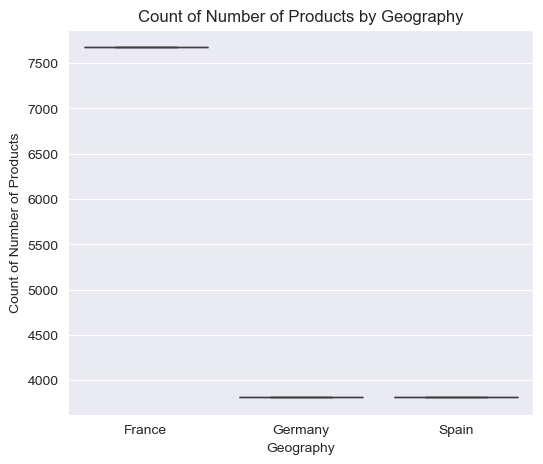

In [45]:
product_count_by_geo = data.groupby(["Geography"])["NumOfProducts"].sum().reset_index()
print(product_count_by_geo)

custom_palette = {
    'Germany': 'orange',
    'Spain': 'green',
    'France': 'skyblue'  # default color for others (you can adjust or remove)
}

plt.figure(figsize=(6, 5))
sns.boxplot(x="Geography", y="NumOfProducts", data=product_count_by_geo)
plt.title("Count of Number of Products by Geography")
plt.xlabel("Geography")
plt.ylabel("Count of Number of Products")
plt.show()